# Neural Networks Implementation

### PreProcess Data

In [1]:
import PreProcessData as pre
import imp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

imp.reload(pre)
X_train, X_valid, y_train, y_valid = pre.PreProcessData()
y_valid = [0 if int(y) == 2 or int(y) == 3 else y for y in y_valid]
y_valid = np.array(y_valid)
y_valid = y_valid.reshape(-1,1)
# print(X_train.head())

/tmp/ipykernel_21012/1802038062.py:2: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  import imp


### Class Construction

In [19]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate

        # Initialize weights and biases
        self.weights_input_hidden = np.random.randn(input_size, hidden_size)
        self.biases_input_hidden = np.zeros((1, hidden_size))
        self.weights_hidden_output = np.random.randn(hidden_size, output_size)
        self.biases_hidden_output = np.zeros((1, output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def softmax(self, z):
        # Subtract the maximum value for numerical stability
        z -= np.max(z)
        
        # Compute softmax scores
        exp_z = np.exp(z)
        softmax_scores = exp_z / np.sum(exp_z, axis=1, keepdims=True)
        
        return softmax_scores


    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def feedforward(self, X):
        # Input to hidden layer
        self.hidden_sum = np.dot(X, self.weights_input_hidden) + self.biases_input_hidden
        self.hidden_activation = self.softmax(self.hidden_sum)

        # Hidden to output layer
        self.output_sum = np.dot(self.hidden_activation, self.weights_hidden_output) + self.biases_hidden_output
        self.output_activation = self.sigmoid(self.output_sum)

        return self.output_activation

    def backward(self, X, y, output):
        # Output layer
        error_output = y - output
        # delta_output = error_output * self.sigmoid_derivative(output)

        # Hidden layer
        error_hidden = error_output.dot(self.weights_hidden_output.T)
        delta_hidden = error_hidden * self.sigmoid_derivative(self.hidden_activation)

        # Update weights and biases
        self.weights_hidden_output += self.hidden_activation.T.dot(error_output) * self.learning_rate
        self.biases_hidden_output += np.sum(error_output, axis=0, keepdims=True) * self.learning_rate
        self.weights_input_hidden += X.T.dot(delta_hidden) * self.learning_rate
        self.biases_input_hidden += np.sum(delta_hidden, axis=0, keepdims=True) * self.learning_rate

    def train(self, X, y, epochs):
        y = y.reshape(-1,1)
        for epoch in range(epochs):
            # Forward pass
            output = self.feedforward(X)

            # Backpropagation
            self.backward(X, y, output)

            # Print loss every 100 epochs
            if (epoch + 1) % 100 == 0:
                loss = np.mean(np.square(y - output)) # MSE, Mean Squared Error
                print(f'Epoch {epoch + 1}, Loss: {loss:.4f}')

    def predict(self, X):
        return self.feedforward(X)

    def validate(self, y_pred, y_valid):
        num_of_correct_predictions = np.sum((y_pred >= 0.5) == y_valid)
        accuracy = num_of_correct_predictions / len(y_valid)
        return accuracy

    def plot(self, y_pred, y_valid):
        y_pred = [0 if y < 0.5 else 1 for y in y_pred]
        # Calculate confusion matrix
        cm = confusion_matrix(y_valid, y_pred)

        # Define labels for the confusion matrix
        labels = [['True Negative', 'False Positive'], ['False Negative', 'True Positive']]

        # Plot confusion matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

        # Annotate cells with labels
        for i in range(2):
            for j in range(2):
                plt.text(j + 0.5, i + 0.3, labels[i][j], ha='center', va='center', color='red')

        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title('Confusion Matrix with Labels')
        plt.show()

### 1 Neuron Model Construction

In [20]:
# Create and train the neural network
input_size = X_train.shape[1]
hidden_size = 1 # Number of neurons in the hidden layer
output_size = 1
learning_rate = 0.001
epochs = 1000

model1 = NeuralNetwork(input_size, hidden_size, output_size, learning_rate)
model1.train(np.array(X_train), np.array(y_train), epochs)
predictions1 = np.array(model1.predict(X_valid))
print("Model Accuracy", model1.validate(predictions1, y_valid))

Epoch 100, Loss: 0.3546
Epoch 200, Loss: 0.3546
Epoch 300, Loss: 0.3546
Epoch 400, Loss: 0.3546
Epoch 500, Loss: 0.3546
Epoch 600, Loss: 0.3546
Epoch 700, Loss: 0.3546
Epoch 800, Loss: 0.3546
Epoch 900, Loss: 0.3546
Epoch 1000, Loss: 0.3546
Model Accuracy 0.37273337810611146


We can see that nothing was learned here because the loss function value didn't change.

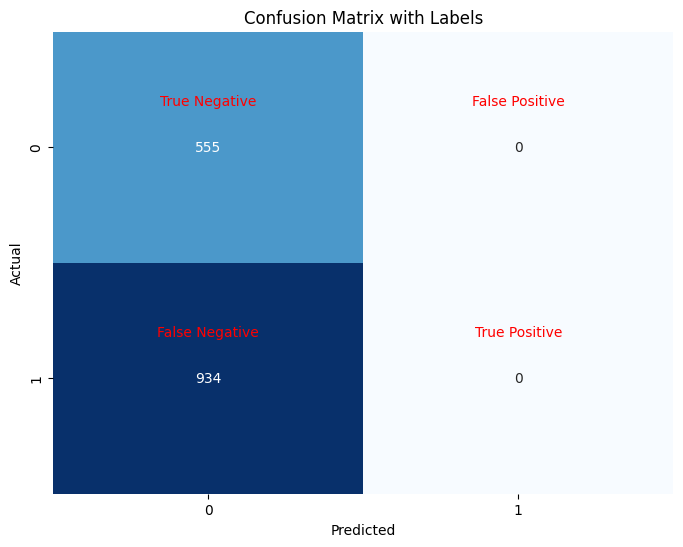

In [21]:
model1.plot(predictions1, y_valid)

### 4 Neuron Model Construction

In [22]:
# Create and train the neural network
input_size = X_train.shape[1]
hidden_size = 4 # Number of neurons in the hidden layer
output_size = 1
learning_rate = 0.001
epochs = 1000

model4 = NeuralNetwork(input_size, hidden_size, output_size, learning_rate)
model4.train(np.array(X_train), np.array(y_train), epochs)
predictions4 = np.array(model4.predict(X_valid))
print("Model Accuracy", model4.validate(predictions4, y_valid))

Epoch 100, Loss: 0.2626
Epoch 200, Loss: 0.2475
Epoch 300, Loss: 0.2423
Epoch 400, Loss: 0.2402
Epoch 500, Loss: 0.2387
Epoch 600, Loss: 0.2377
Epoch 700, Loss: 0.2389
Epoch 800, Loss: 0.2419
Epoch 900, Loss: 0.2466
Epoch 1000, Loss: 0.2501
Model Accuracy 0.661517797179315


However when we add more neurons we can see that the Loss goes down and the model accuracy goes up.

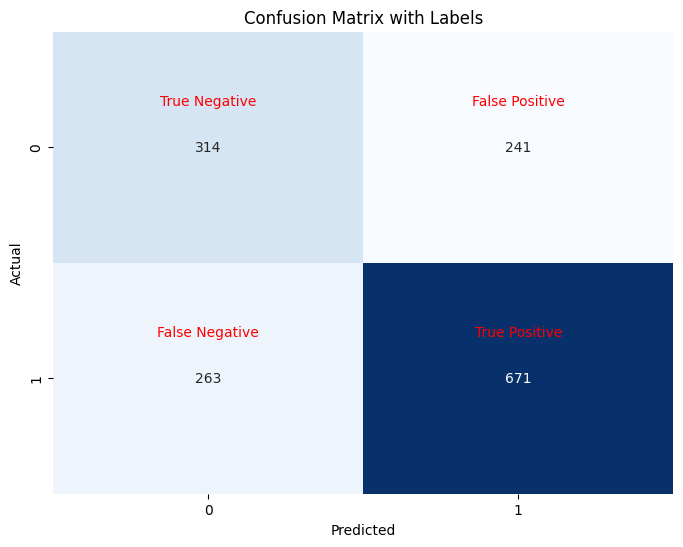

In [23]:
model4.plot(predictions4, y_valid)

### 16 Neuron Model Construction

In [24]:
# Create and train the neural network
input_size = X_train.shape[1]
hidden_size = 16 # Number of neurons in the hidden layer
output_size = 1
learning_rate = 0.001
epochs = 1000

model16 = NeuralNetwork(input_size, hidden_size, output_size, learning_rate)
model16.train(np.array(X_train), np.array(y_train), epochs)
predictions16 = np.array(model16.predict(X_valid))
print("Model Accuracy", model16.validate(predictions16, y_valid))

Epoch 100, Loss: 0.2498
Epoch 200, Loss: 0.2435
Epoch 300, Loss: 0.2403
Epoch 400, Loss: 0.2389
Epoch 500, Loss: 0.2383
Epoch 600, Loss: 0.2359
Epoch 700, Loss: 0.2364
Epoch 800, Loss: 0.2369
Epoch 900, Loss: 0.2365
Epoch 1000, Loss: 0.2374
Model Accuracy 0.6984553391537945


Same process of adding more neurons

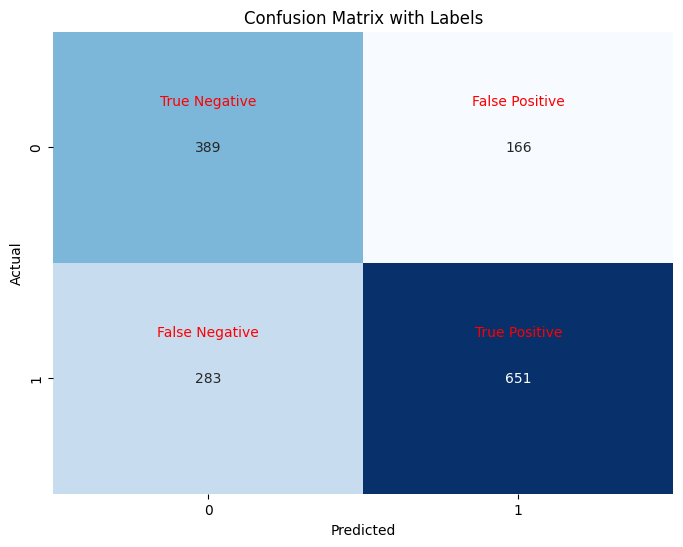

In [25]:
model16.plot(predictions16, y_valid)

### 32 Neuron Model Construction

In [26]:
# Create and train the neural network
input_size = X_train.shape[1]
hidden_size = 32 # Number of neurons in the hidden layer
output_size = 1
learning_rate = 0.001
epochs = 1000

model32 = NeuralNetwork(input_size, hidden_size, output_size, learning_rate)
model32.train(np.array(X_train), np.array(y_train), epochs)
predictions32 = np.array(model32.predict(X_valid))
print("Model Accuracy", model32.validate(predictions32, y_valid))

Epoch 100, Loss: 0.2458
Epoch 200, Loss: 0.2327
Epoch 300, Loss: 0.2266
Epoch 400, Loss: 0.2234
Epoch 500, Loss: 0.2210
Epoch 600, Loss: 0.2180
Epoch 700, Loss: 0.2165
Epoch 800, Loss: 0.2188
Epoch 900, Loss: 0.2216
Epoch 1000, Loss: 0.2219
Model Accuracy 0.7024848891873741


Same process of adding more neurons

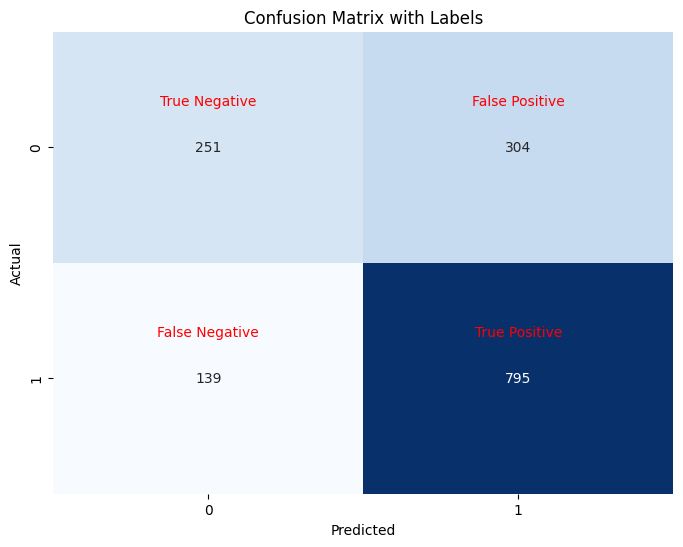

In [27]:
model32.plot(predictions32, y_valid)

### 0.002 Learning rate

In [30]:
# Create and train the neural network
input_size = X_train.shape[1]
hidden_size = 32 # Number of neurons in the hidden layer
output_size = 1
learning_rate = 0.002
epochs = 1000

model002 = NeuralNetwork(input_size, hidden_size, output_size, learning_rate)
model002.train(np.array(X_train), np.array(y_train), epochs)
predictions002 = np.array(model002.predict(X_valid))
print(model002.validate(predictions002, y_valid))

Epoch 100, Loss: 0.2383
Epoch 200, Loss: 0.2102
Epoch 300, Loss: 0.2068
Epoch 400, Loss: 0.2031
Epoch 500, Loss: 0.1924
Epoch 600, Loss: 0.1956
Epoch 700, Loss: 0.1977
Epoch 800, Loss: 0.2057
Epoch 900, Loss: 0.2003
Epoch 1000, Loss: 0.2067
0.6762928139691068


When we try and increase the learning rate, the 'bounce' happens between epoch 500 and epoch 600. Because there was a bounce, we know that the learning rate was too high. Also notice that the loss function is lower, but the model accuracy is lower too. This is not a trade off we want.

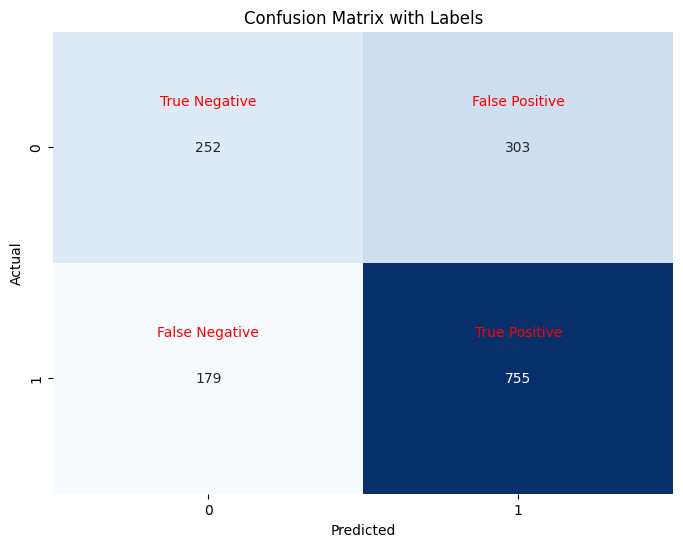

In [31]:
model002.plot(predictions002, y_valid)

### 0.0005 Learning rate

In [32]:
# Create and train the neural network
input_size = X_train.shape[1]
hidden_size = 32 # Number of neurons in the hidden layer
output_size = 1
learning_rate = 0.0005
epochs = 1000

model0005 = NeuralNetwork(input_size, hidden_size, output_size, learning_rate)
model0005.train(np.array(X_train), np.array(y_train), epochs)
predictions0005 = np.array(model0005.predict(X_valid))
print(model0005.validate(predictions0005, y_valid))

Epoch 100, Loss: 0.2668
Epoch 200, Loss: 0.2516
Epoch 300, Loss: 0.2436
Epoch 400, Loss: 0.2385
Epoch 500, Loss: 0.2340
Epoch 600, Loss: 0.2306
Epoch 700, Loss: 0.2280
Epoch 800, Loss: 0.2253
Epoch 900, Loss: 0.2231
Epoch 1000, Loss: 0.2210
0.7112155809267965


The learning rate is slower here which leads to a higher loss then the learning rate of 0.002, but gives us a better prediction accuracy of 0.71. This is the trade of we want and reduces the true risk (empirical risk is higher, but true risk is lower).

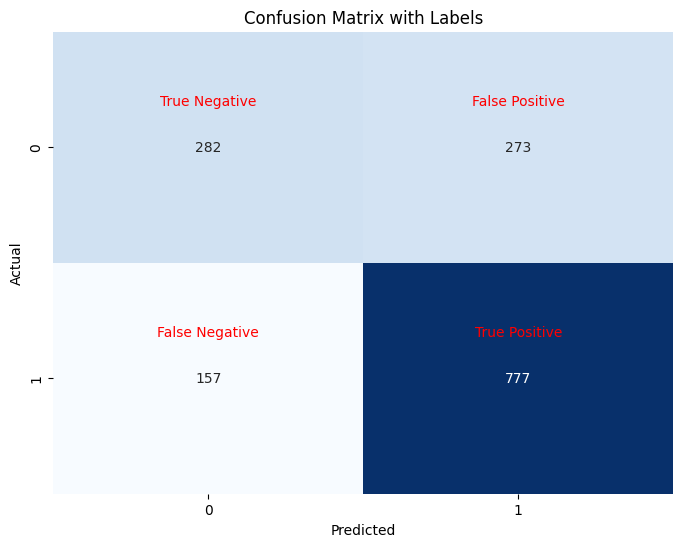

In [33]:
model0005.plot(predictions0005, y_valid)

### 1500 iterations

In [38]:
# Create and train the neural network
input_size = X_train.shape[1]
hidden_size = 32 # Number of neurons in the hidden layer
output_size = 1
learning_rate = 0.0005
epochs = 1500

model1500 = NeuralNetwork(input_size, hidden_size, output_size, learning_rate)
model1500.train(np.array(X_train), np.array(y_train), epochs)
predictions1500 = np.array(model1500.predict(X_valid))
print(model1500.validate(predictions1500, y_valid))

Epoch 100, Loss: 0.2640
Epoch 200, Loss: 0.2474
Epoch 300, Loss: 0.2398
Epoch 400, Loss: 0.2353
Epoch 500, Loss: 0.2319
Epoch 600, Loss: 0.2293
Epoch 700, Loss: 0.2267
Epoch 800, Loss: 0.2254
Epoch 900, Loss: 0.2248
Epoch 1000, Loss: 0.2245
Epoch 1100, Loss: 0.2241
Epoch 1200, Loss: 0.2238
Epoch 1300, Loss: 0.2238
Epoch 1400, Loss: 0.2239
Epoch 1500, Loss: 0.2245
0.7159167226326394


The more iterations allows the low learning rate to reach near the max loss possible. However in this cause it reached the 'bounce' at around 1300 to 1400 epoch. Even though it reached this bounce, it didn't bounce off to bad leaving us with 0.715% accuracy.

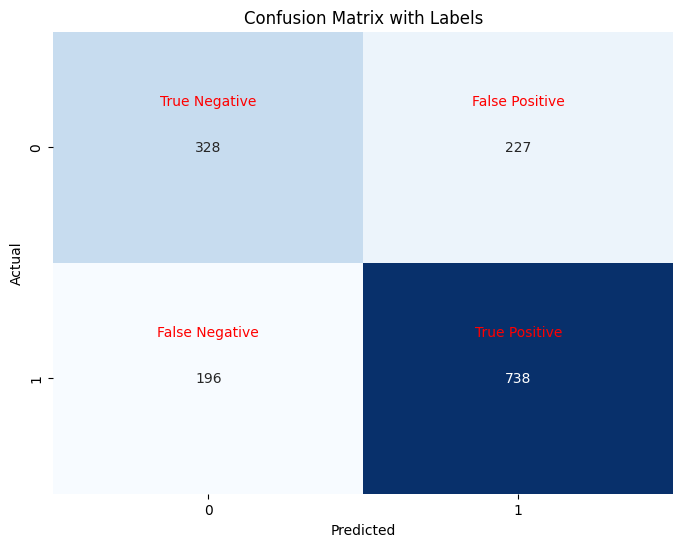

In [39]:
model1500.plot(predictions1500, y_valid)

### COMBINE EVERYTHING! 128 Neurons, 0.0002 Learning Rate, 5000 Iterations

In [41]:
# Create and train the neural network
input_size = X_train.shape[1]
hidden_size = 128 # Number of neurons in the hidden layer
output_size = 1
learning_rate = 0.0002
epochs = 4000

modelBIG = NeuralNetwork(input_size, hidden_size, output_size, learning_rate)
modelBIG.train(np.array(X_train), np.array(y_train), epochs)
predictionsBIG = np.array(modelBIG.predict(X_valid))
print(modelBIG.validate(predictionsBIG, y_valid))

Epoch 100, Loss: 0.2777
Epoch 200, Loss: 0.2606
Epoch 300, Loss: 0.2510
Epoch 400, Loss: 0.2448
Epoch 500, Loss: 0.2396
Epoch 600, Loss: 0.2350
Epoch 700, Loss: 0.2308
Epoch 800, Loss: 0.2277
Epoch 900, Loss: 0.2252
Epoch 1000, Loss: 0.2230
Epoch 1100, Loss: 0.2209
Epoch 1200, Loss: 0.2190
Epoch 1300, Loss: 0.2173
Epoch 1400, Loss: 0.2155
Epoch 1500, Loss: 0.2138
Epoch 1600, Loss: 0.2123
Epoch 1700, Loss: 0.2107
Epoch 1800, Loss: 0.2090
Epoch 1900, Loss: 0.2073
Epoch 2000, Loss: 0.2057
Epoch 2100, Loss: 0.2041
Epoch 2200, Loss: 0.2025
Epoch 2300, Loss: 0.2009
Epoch 2400, Loss: 0.1993
Epoch 2500, Loss: 0.1977
Epoch 2600, Loss: 0.1961
Epoch 2700, Loss: 0.1948
Epoch 2800, Loss: 0.1934
Epoch 2900, Loss: 0.1924
Epoch 3000, Loss: 0.1912
Epoch 3100, Loss: 0.1900
Epoch 3200, Loss: 0.1888
Epoch 3300, Loss: 0.1877
Epoch 3400, Loss: 0.1866
Epoch 3500, Loss: 0.1855
Epoch 3600, Loss: 0.1848
Epoch 3700, Loss: 0.1838
Epoch 3800, Loss: 0.1828
Epoch 3900, Loss: 0.1819
Epoch 4000, Loss: 0.1809
0.6863666

Sadly even though there is not 'bounce' the true risk is on the up trend, while the empirical risk is on the down trend.

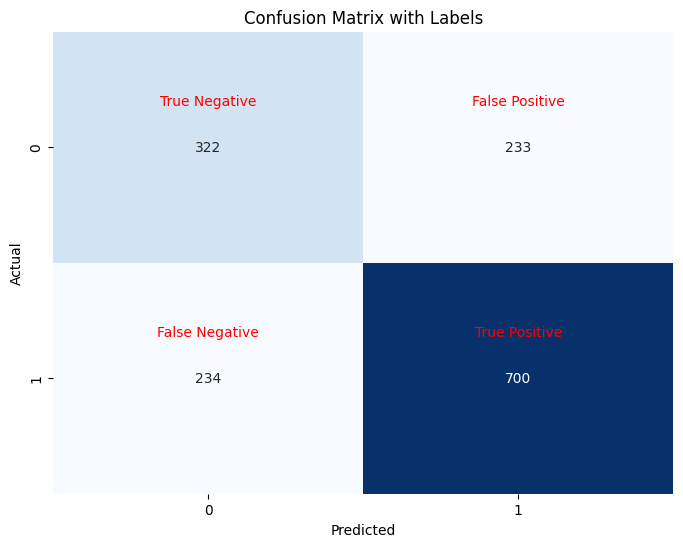

In [42]:
modelBIG.plot(predictionsBIG, y_valid)